In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', 500)

# For plotting
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


### Load in the Dataset And Parse Tweet Text

In [4]:
tweets = pd.read_csv('tweets.csv')

In [5]:
def process_tweets(tweets):
    tweets['tweet_datetime'] = pd.to_datetime(tweets['tweet_date'])
    tweets['tweet_date'] = tweets['tweet_datetime'].dt.date
    tweets['wordle_id'] = tweets['tweet_text'].str[:10]
    tweets['n_attempts'] = tweets['tweet_text'].str[11].astype('int')
    tweets['id'] = tweets['tweet_text'].str[7:10].astype('int')
    return tweets
tweets = process_tweets(tweets)

### How many tweets do we have for each day

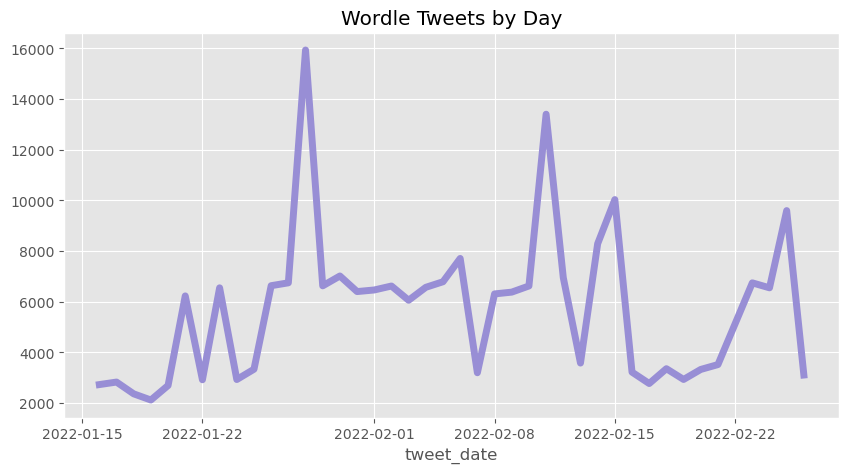

In [6]:
tweets_per_day = tweets['tweet_date'].value_counts().sort_index()
tweets_per_day.plot(figsize=(10, 5),
                    title='Wordle Tweets by Day',
                    color= color_pal[2], lw=5 )
plt.show()

### Number of Attempts Analysis

In [22]:
tweets.groupby(['wordle_id', 'n_attempts']).size() \
    .unstack(fill_value=0).style.background_gradient(axis=1)   

n_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


### How many attempts does it usually take to solve?

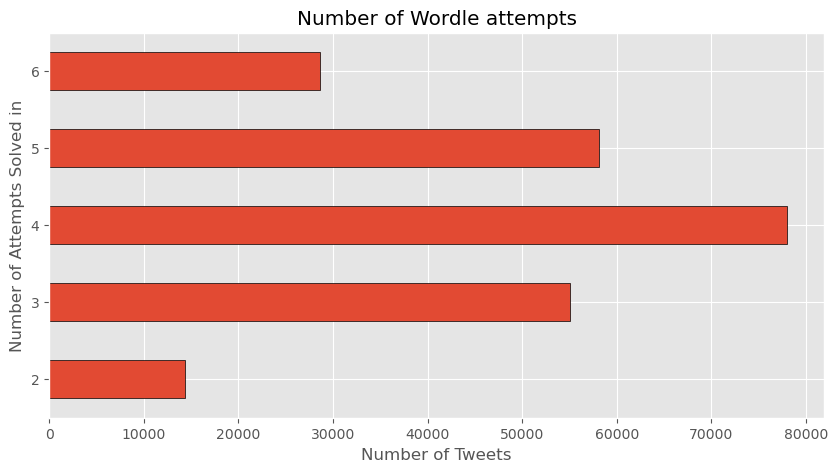

In [30]:
tweets['n_attempts'].value_counts().sort_index()\
                    .plot(figsize=(10, 5), kind='barh', 
                    xlabel='Number of Tweets', ylabel='Number of Attempts Solved in', 
                    title='Number of Wordle attempts', edgecolor='black')
plt.show()

### Parse Tweet Text

In [ ]:
# Make dark squares consistant
tweets['tweet_text'] = tweets['tweet_text'].str.replace('⬜','⬛')

In [39]:
def parse_tweet_text(tweets):
    for n in range(6):
        n += 1 
        tweets[f'has_guess{n}']= tweets['tweet_text'].str.split('\n').str[n+1]\
                            .str.contains('|'.join(['🟨','⬛','🟩'])) \
                            .fillna(False)

        # Parse out the tweet text
        tweets.loc[tweets[f'has_guess{n}'], f'guess{n}'] = \
                tweets['tweet_text'].str.split('\n').str[n + 1].str[:5]

        # Count number correct, misplaced, and incorrect
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_incorrect'] = tweets[f'guess{n}'].str.count('⬛')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_wrong_spot'] = tweets[f'guess{n}'].str.count('🟨')
        tweets.loc[tweets[f'has_guess{n}'],
                    f'guess{n}_correct'] = tweets[f'guess{n}'].str.count('🟩')
        tweets.loc[tweets[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return tweets
parse_tweet_text(tweets)

C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .fillna(False)
C:\Users\hp\AppData\Local\Temp\ipykernel_13788\3931592385.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_wrong_spot,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_wrong_spot,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_wrong_spot,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_wrong_spot,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,3.0,2.0,0.0,NaN,True,🟩⬛⬛⬛⬛,4.0,0.0,1.0,True,🟩🟩🟨⬛⬛,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,False,NaN,NaN,NaN,NaN,NaN,True,🟩🟩🟨🟨⬜,0.0,2.0,2.0,True,🟩🟩⬜🟩🟨,0.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬜⬜⬜🟨⬜,0.0,1.0,0.0,NaN,True,⬜🟩⬜🟨⬜,0.0,1.0,1.0,True,⬜🟩⬜🟨⬜,0.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬜⬜🟨⬜⬜,0.0,1.0,0.0,NaN,True,🟨🟨⬜⬜⬜,0.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,NaN,True,🟩🟩🟩⬛⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234181,Wordle 251,1497413074709590024,2022-02-26,SammieLee14,Wordle 251 6/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n⬛⬛🟨⬛⬛\n⬛🟩⬛⬛⬛\n...,2022-02-26 03:27:52+00:00,6,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,⬛🟩🟨⬛⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0
234182,Wordle 251,1497413096457097218,2022-02-26,real_hotaru,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛⬛⬛⬛⬛\n🟨⬛🟨⬛⬛\n⬛⬛🟨⬛⬛\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,True,🟨⬛🟨⬛⬛,3.0,2.0,0.0,True,⬛⬛🟨⬛⬛,4.0,1.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234183,Wordle 251,1497413098210222084,2022-02-26,mmelmazz,Wordle 251 5/6\n\n⬛⬛⬛⬛⬛\n⬛🟩⬛⬛⬛\n🟨🟩⬛⬛⬛\n⬛🟩🟩🟩🟩\n...,2022-02-26 03:27:57+00:00,5,251,True,⬛⬛⬛⬛⬛,5.0,0.0,0.0,NaN,True,⬛🟩⬛⬛⬛,4.0,0.0,1.0,True,🟨🟩⬛⬛⬛,3.0,1.0,1.0,True,⬛🟩🟩🟩🟩,1.0,0.0,4.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN
234184,Wordle 251,1497413110725943298,2022-02-26,Ancient_Wonder,Wordle 251 3/6\n\n⬜⬜🟩⬜⬜\n🟩🟩⬜🟩⬜\n🟩🟩🟩🟩🟩,2022-02-26 03:28:00+00:00,3,251,True,⬜⬜🟩⬜⬜,0.0,0.0,1.0,NaN,True,🟩🟩⬜🟩⬜,0.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [31]:
print(tweets['tweet_text'].values[0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩
